<a href="https://colab.research.google.com/github/sharsh09/-_-/blob/main/Task2_Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2 - Unemployment Analysis

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
data.size

2403

In [6]:
data.shape

(267, 9)

In [7]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


Data Visualization

In [9]:
# Renaming the columns
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

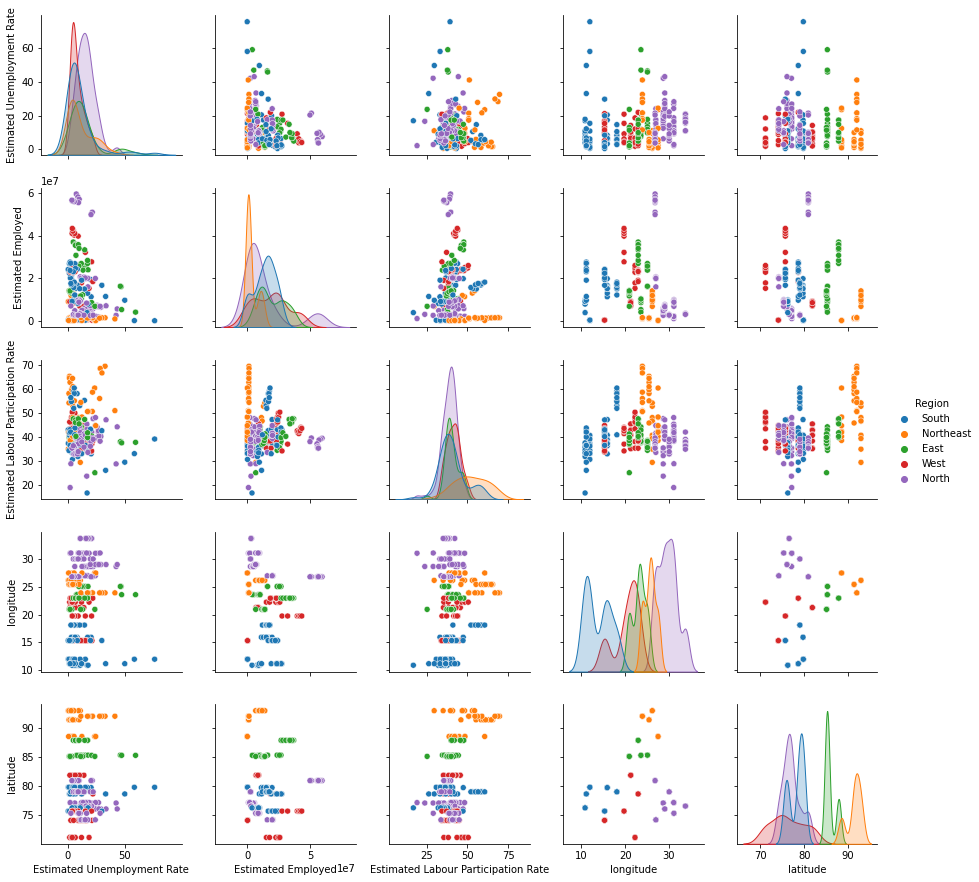

In [10]:
sns.pairplot(data, hue='Region')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

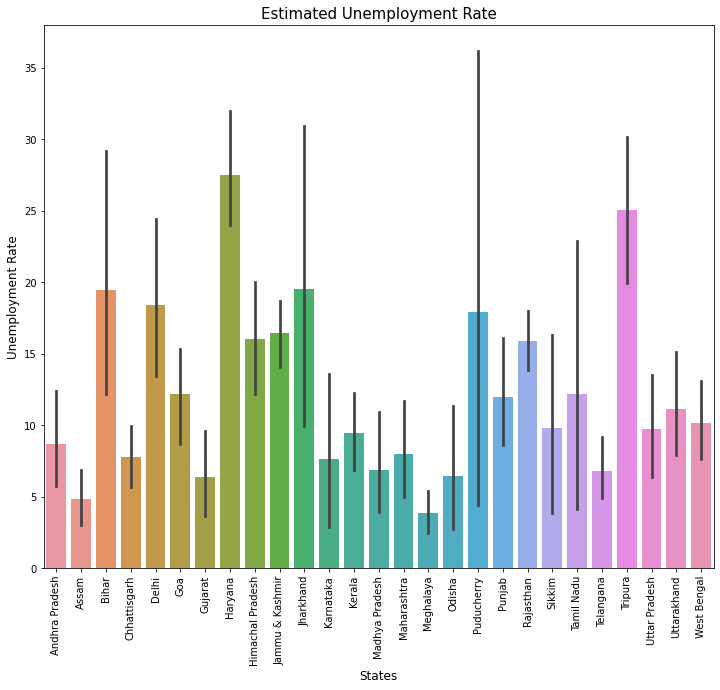

In [11]:
# Unemployment Rate according to various states 
plt.figure(figsize=(12,10))
sns.barplot(data = data, x=data['States'],y=data['Estimated Unemployment Rate'])
plt.ylabel('Unemployment Rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Estimated Unemployment Rate', fontsize=15)
plt.xticks(rotation='vertical')

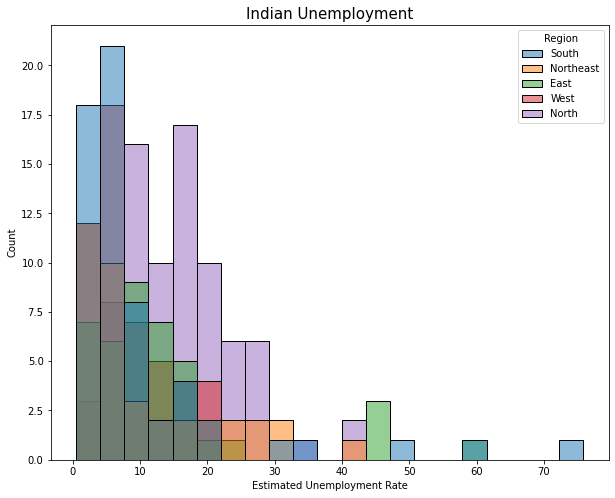

In [12]:
# Unemployment rate according to different regions of India
plt.figure(figsize=(10, 8))
plt.title("Indian Unemployment", fontsize=15)
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

In [13]:
#See exact numbers
make_total = data.pivot_table("Estimated Unemployment Rate",index=['Region'],aggfunc='mean')
topstate=make_total.sort_values(by='Region',ascending=False)
print(topstate)

           Estimated Unemployment Rate
Region                                
West                          8.239000
South                        10.454667
Northeast                    10.950263
North                        15.889620
East                         13.916000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


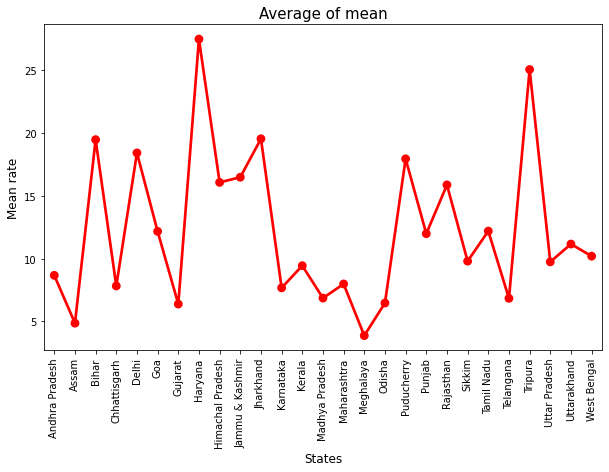

In [14]:
# Mean of Unemployment rate state by state
grouped_df = data.groupby(["States"])["Estimated Unemployment Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(10,6))
sns.pointplot(grouped_df['States'].values, grouped_df['Estimated Unemployment Rate'].values, alpha=0.8, color="red")
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

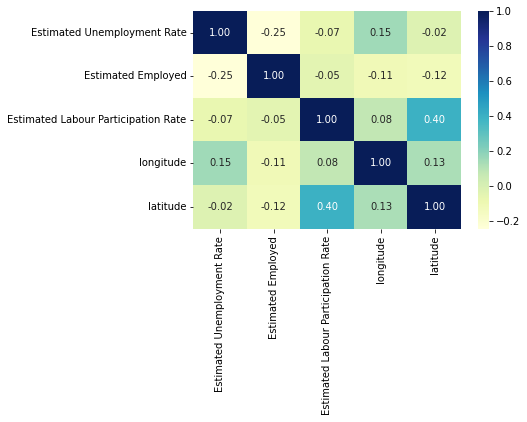

In [16]:
# Correlation between the features of the dataset 
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, fmt=".2f")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

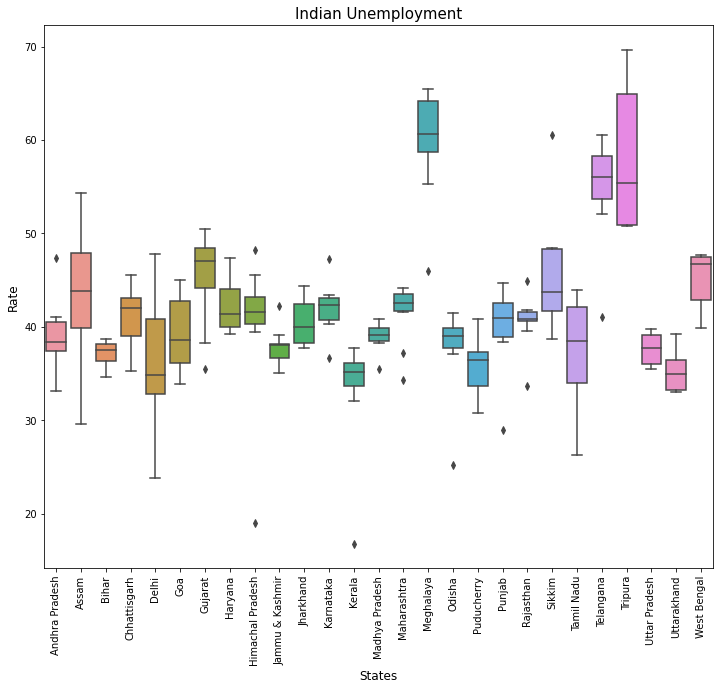

In [17]:
# Estimated Labour Participation Rate(%) according to different States of India
plt.figure(figsize=(12,10))
sns.boxplot(data = data, x=data['States'],y=data['Estimated Labour Participation Rate'])
plt.ylabel('Rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Indian Unemployment', fontsize=15)
plt.xticks(rotation='vertical')

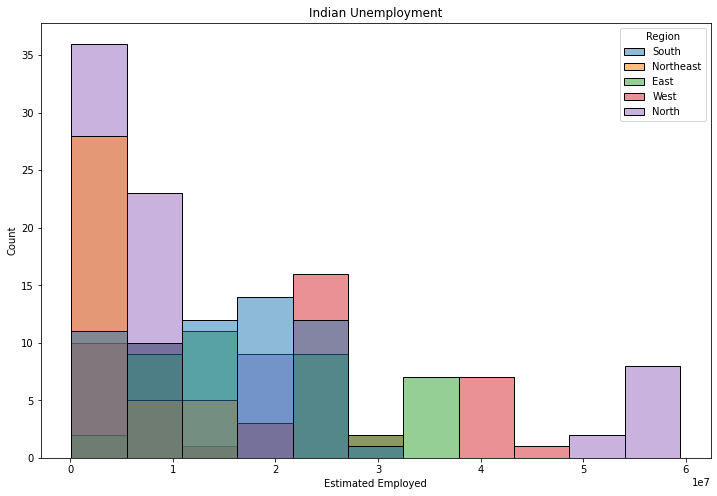

In [18]:
# Estimated number of employees according to different regions of India
plt.figure(figsize=(12,8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

In [19]:
# Dashboard to analyze the unemployment rate of each Indian state by region.
unemployment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=500, height=500, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()